# Introduction
    We will explore two most popular for building our Recommendation system - Popularity Based and Collaborative Filtering. With the help of these methods, our system can deliver tailored recommendations to the users and provide them personalized books with their personal taste
    
# Popularity Based Recommendation
    Popularity based system is the most simplest yet most straightforward approach to suggest the items(i.e. books). Unlike, personalized recommendation systems that relies on user-specific data, popularity based approach based recommendations solely based on the overall popularity of the book
    
# Collaborative Filtering Recommendation
    Collaborative filtering is a popular and effective technique used to suggest items(books) to the users based on the preferences and behaviour of other like-minded users. This technique finds user behaviour and preferences and looks for patterns among the users who have similar tastes.

In [1]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading Datasets
books = pd.read_csv('Books.csv')
ratings = pd.read_csv('Ratings.csv')
users = pd.read_csv('Users.csv')

C:\Users\ansari\AppData\Local\Temp\ipykernel_4132\2345181626.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
# Getting information about the datasets
print(books.info())
print('************'*10)
print()
print(ratings.info())
print('************'*10)
print()
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None
************************************************************************************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      114978

In [7]:
print(f'Null values in books:\n{books.isnull().sum()}')
print('**********'*10)
print()
print(f'Null values in ratings:\n{ratings.isnull().sum()}')
print('**********'*10)
print()
print(f'Null values in users:\n{users.isnull().sum()}')

Null values in books:
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
****************************************************************************************************

Null values in ratings:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
****************************************************************************************************

Null values in users:
User-ID          0
Location         0
Age         110762
dtype: int64


As we can see, Age column has so many null values and since it has not much importance in our Recommendation systems, we will be dropping it

In [8]:
# Searching for duplicate observations
print(books.duplicated().sum())

print(users.duplicated().sum())

print(ratings.duplicated().sum())

0
0
0


# EDA

### Authors with Most books published

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Agatha Christie'),
  Text(1, 0, 'William Shakespeare'),
  Text(2, 0, 'Stephen King'),
  Text(3, 0, 'Ann M. Martin'),
  Text(4, 0, 'Carolyn Keene'),
  Text(5, 0, 'Francine Pascal'),
  Text(6, 0, 'Isaac Asimov'),
  Text(7, 0, 'Nora Roberts'),
  Text(8, 0, 'Barbara Cartland'),
  Text(9, 0, 'Charles Dickens')])

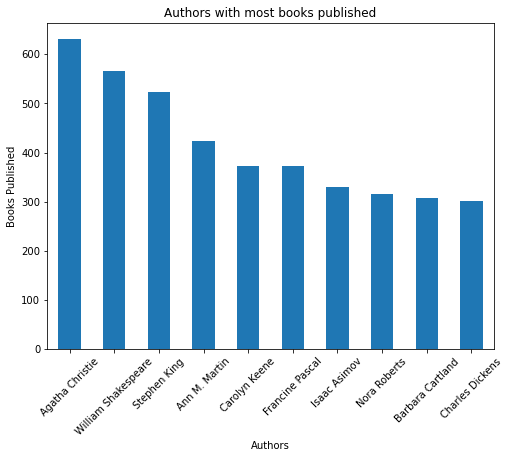

In [9]:
plt.figure(figsize=(8,6))
# Create a bar chart
books['Book-Author'].value_counts()[:10].plot(kind='bar')
plt.xlabel('Authors')
plt.ylabel('Books Published')
plt.title('Authors with most books published')
plt.xticks(rotation=45)

### Most books published in a year

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2002'),
  Text(1, 0, '2001'),
  Text(2, 0, '1999'),
  Text(3, 0, '2000'),
  Text(4, 0, '1998'),
  Text(5, 0, '2003'),
  Text(6, 0, '1997'),
  Text(7, 0, '1996'),
  Text(8, 0, '1995'),
  Text(9, 0, '1994')])

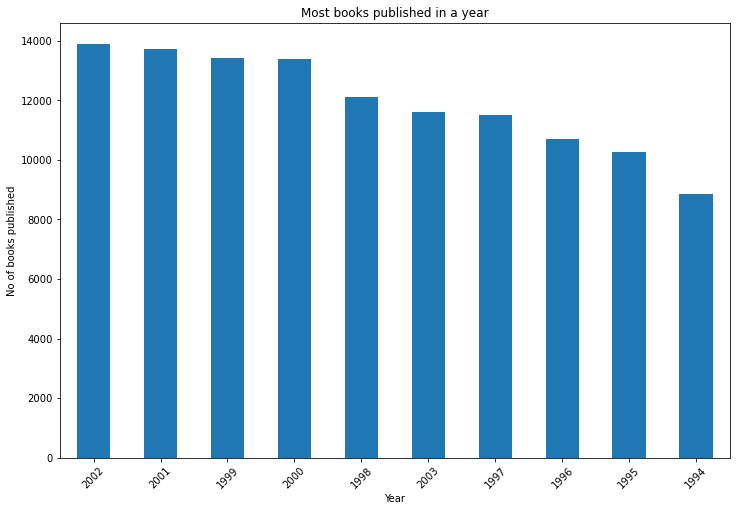

In [10]:
plt.figure(figsize = (12,8))
year = books['Year-Of-Publication'].value_counts().head(10)
year.plot(kind = 'bar')
plt.title('Most books published in a year')
plt.xlabel('Year')
plt.ylabel('No of books published')
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Harlequin'),
  Text(1, 0, 'Silhouette'),
  Text(2, 0, 'Pocket'),
  Text(3, 0, 'Ballantine Books'),
  Text(4, 0, 'Bantam Books'),
  Text(5, 0, 'Scholastic'),
  Text(6, 0, 'Simon &amp; Schuster'),
  Text(7, 0, 'Penguin Books'),
  Text(8, 0, 'Berkley Publishing Group'),
  Text(9, 0, 'Warner Books')])

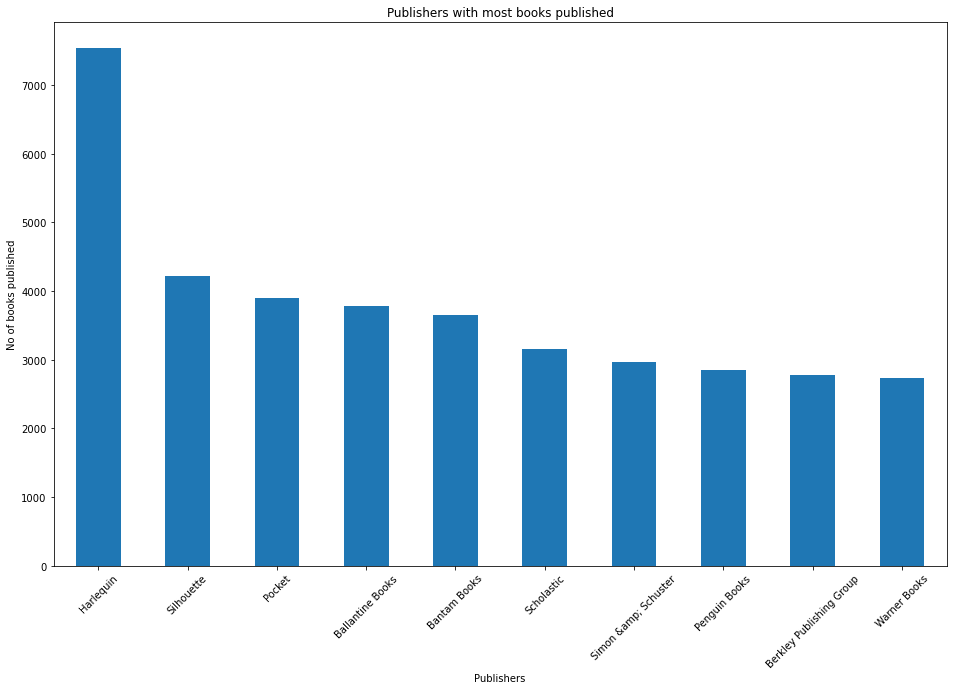

In [11]:
plt.figure(figsize=(16,10))
books['Publisher'].value_counts().head(10).plot(kind='bar')
plt.title('Publishers with most books published')
plt.xlabel('Publishers')
plt.ylabel('No of books published')
plt.xticks(rotation = 45)

In [12]:
merged_df = pd.merge(books,ratings,on='ISBN')
merged_df.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5


In [13]:
merged_df.shape

(1031136, 10)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

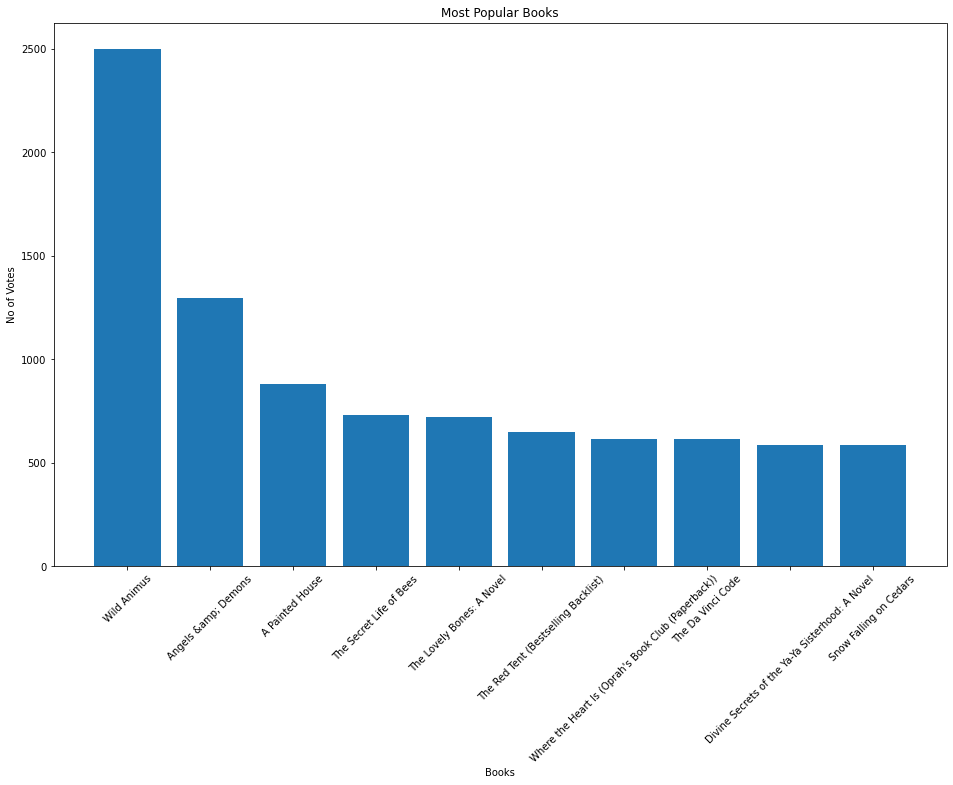

In [14]:
# 10 Most popular Books
ratings_count = merged_df['ISBN'].value_counts().head(10)
most_popular_books = books[books['ISBN'].isin(ratings_count.index)]

plt.figure(figsize=(16,10))

plt.bar(most_popular_books['Book-Title'],ratings_count)
plt.title('Most Popular Books')
plt.xlabel('Books')
plt.ylabel('No of Votes')
plt.xticks(rotation = 45)

# Model Building

## Popularity Based Recommender System

In [15]:
# Top 100 most popular Books
num_rating_df = merged_df.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns = {'Book-Rating':'Num_ratings'},inplace = True)
num_rating_df

,Book-Title,Num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [16]:
avg_rating_df = merged_df.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating' : 'avg_ratings'},inplace = True)
avg_rating_df

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [17]:
popular_df = avg_rating_df.merge(num_rating_df,on = 'Book-Title')
popular_df

,Book-Title,avg_ratings,Num_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000,4
1,Always Have Popsicles,0.000000,1
2,Apple Magic (The Collector's series),0.000000,1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000,1
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000,1
...,...,...,...
241066,Ã?Â?lpiraten.,0.000000,2
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000,4
241068,Ã?Â?sterlich leben.,7.000000,1
241069,Ã?Â?stlich der Berge.,2.666667,3


In [18]:
popular_df = popular_df[popular_df['Num_ratings']>300].sort_values('avg_ratings',ascending = False).head(100)
popular_df

,Book-Title,avg_ratings,Num_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),5.852804,428
80422,Harry Potter and the Goblet of Fire (Book 4),5.824289,387
80426,Harry Potter and the Order of the Phoenix (Boo...,5.501441,347
80414,Harry Potter and the Chamber of Secrets (Book 2),5.183453,556
187377,The Fellowship of the Ring (The Lord of the Ri...,4.948370,368
...,...,...,...
181210,The Cider House Rules,2.969466,393
175131,The Alienist,2.965714,350
227772,Violets Are Blue,2.955145,379
204000,The Rainmaker,2.922156,501


In [19]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','avg_ratings','Year-Of-Publication','Num_ratings','Publisher','Image-URL-M']]
popular_df

,Book-Title,Book-Author,avg_ratings,Year-Of-Publication,Num_ratings,Publisher,Image-URL-M
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,5.852804,1999,428,Scholastic,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,5.824289,2000,387,Scholastic,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,5.501441,2003,347,Scholastic,http://images.amazon.com/images/P/043935806X.0...
9,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,5.183453,2000,556,Scholastic,http://images.amazon.com/images/P/0439064872.0...
12,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,4.948370,1986,368,Del Rey,http://images.amazon.com/images/P/0345339703.0...
...,...,...,...,...,...,...,...
355,The Cider House Rules,John Irving,2.969466,1986,393,Bantam Books,http://images.amazon.com/images/P/0553258001.0...
363,The Alienist,Caleb Carr,2.965714,1995,350,Bantam Books,http://images.amazon.com/images/P/0553572997.0...
365,Violets Are Blue,James Patterson,2.955145,2002,379,Warner Vision,http://images.amazon.com/images/P/0446611212.0...
369,The Rainmaker,JOHN GRISHAM,2.922156,1996,501,Dell,http://images.amazon.com/images/P/044022165X.0...


## Collaborative Filtering Recommender System

In [20]:
# DataFrame merged from books and ratings datasets on the basis of ISBN
merged_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0
...,...,...,...,...,...,...,...,...,...,...
1031131,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463,7
1031132,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579,4
1031133,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680,0
1031134,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680,0


In [21]:
# Grouping on the basis of User-ID and taking only those users who has rated more than 200 books
num_users = merged_df.groupby('User-ID').count()['Book-Rating']
# num_users gives a Series of 'User ID' and their count of ratings 
popular_users = num_users[num_users>200].index
# Taking 'User ID' of users who has ratend more than 200 books 
popular_users

Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,   6323,
         6543,
       ...
       271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427, 277639,
       278418],
      dtype='int64', name='User-ID', length=811)

In [22]:
num_users

User-ID
2          1
8         17
9          3
10         1
12         1
          ..
278846     1
278849     4
278851    23
278852     1
278854     8
Name: Book-Rating, Length: 92106, dtype: int64

In [23]:
filtered_rating = merged_df[merged_df['User-ID'].isin(popular_users)]
# Filtering data on the basis of popular/experienced users
filtered_rating

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,85526,0
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,96054,0
10,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,177458,0
21,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,110912,10
...,...,...,...,...,...,...,...,...,...,...
1031124,0231128444,Slow Food(The Case For Taste),Carlo Petrini,2003,Columbia University Press,http://images.amazon.com/images/P/0231128444.0...,http://images.amazon.com/images/P/0231128444.0...,http://images.amazon.com/images/P/0231128444.0...,275970,0
1031125,0520242335,Strong Democracy : Participatory Politics for ...,Benjamin R. Barber,2004,University of California Press,http://images.amazon.com/images/P/0520242335.0...,http://images.amazon.com/images/P/0520242335.0...,http://images.amazon.com/images/P/0520242335.0...,275970,0
1031126,0762412119,"Burpee Gardening Cyclopedia: A Concise, Up to ...",Allan Armitage,2002,Running Press Book Publishers,http://images.amazon.com/images/P/0762412119.0...,http://images.amazon.com/images/P/0762412119.0...,http://images.amazon.com/images/P/0762412119.0...,275970,0
1031127,1582380805,Tropical Rainforests: 230 Species in Full Colo...,"Allen M., Ph.D. Young",2001,Golden Guides from St. Martin's Press,http://images.amazon.com/images/P/1582380805.0...,http://images.amazon.com/images/P/1582380805.0...,http://images.amazon.com/images/P/1582380805.0...,275970,0


In [24]:
num_books =filtered_rating.groupby('Book-Title').count()['Book-Rating']
# num_books gives a Series of 'Book-Title' and their count of ratings
popular_books = num_books[num_books >= 50].index
# Taking 'Book-Title' of books with atleast 50 ratings
popular_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [25]:
final_data = filtered_rating[filtered_rating['Book-Title'].isin(popular_books)]
# Filtering data on the basis of popular books(books with atleast 50 ratings)
final_data

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
31,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9
33,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,36836,0
34,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,46398,9
38,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113270,0
39,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113519,0
...,...,...,...,...,...,...,...,...,...,...
1028414,1878702831,Echoes,Nancy Morse,1992,Meteor Publishing Corporation,http://images.amazon.com/images/P/1878702831.0...,http://images.amazon.com/images/P/1878702831.0...,http://images.amazon.com/images/P/1878702831.0...,238781,0
1028600,0394429869,I Know Why the Caged Bird Sings,Maya Angelou,1996,Random House,http://images.amazon.com/images/P/0394429869.0...,http://images.amazon.com/images/P/0394429869.0...,http://images.amazon.com/images/P/0394429869.0...,239594,8
1028602,0449001164,The Promise,CHAIM POTOK,1997,Ballantine Books,http://images.amazon.com/images/P/0449001164.0...,http://images.amazon.com/images/P/0449001164.0...,http://images.amazon.com/images/P/0449001164.0...,239594,7
1028815,0743527631,The Pillars of the Earth,Ken Follett,2002,Encore,http://images.amazon.com/images/P/0743527631.0...,http://images.amazon.com/images/P/0743527631.0...,http://images.amazon.com/images/P/0743527631.0...,240144,0


In [26]:
pt = final_data.pivot_table(index='Book-Title',values='Book-Rating',columns='User-ID')
pt.head(2)

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
pt.fillna(0,inplace=True)
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
pt.index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

In [30]:
similarity = cosine_similarity(pt)
similarity

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [31]:
similarity.shape

(706, 706)

In [32]:
sorted(list(enumerate((similarity[0]))),key = lambda x:x[1], reverse = True)[1:6]

[(47, 0.2702651417103732),
 (545, 0.26396193711234966),
 (82, 0.2366937434740099),
 (634, 0.23299389358170394),
 (551, 0.2262639743141286)]

In [33]:
def recommend(book):
    # fetch index from pivot table
    index = np.where(pt.index==book)[0][0]
    distances = sorted(list(enumerate((similarity[index]))),key = lambda x:x[1], reverse = True)[1:6]
    
    title = []
    img = []
    author = []
    year = []
    
    for i in distances:
        title.append(pt.index[i[0]])
        img.append(final_data[final_data['Book-Title'] == pt.index[i[0]]]['Image-URL-M'][:1])
        author.append(final_data[final_data['Book-Title'] == pt.index[i[0]]]['Book-Author'][:1])
        year.append(final_data[final_data['Book-Title'] == pt.index[i[0]]]['Year-Of-Publication'][:1])
        
        
    return title, img, author, year

In [34]:
sorted(list(enumerate((similarity[47]))),key = lambda x:x[1], reverse = True)[1:6]

[(0, 0.2702651417103732),
 (45, 0.2416404696056939),
 (324, 0.2362570952024308),
 (422, 0.21897040971615078),
 (92, 0.20936355536567294)]

In [35]:
recommend('1984')

(['Animal Farm',
  "The Handmaid's Tale",
  'Brave New World',
  'The Vampire Lestat (Vampire Chronicles, Book II)',
  'The Hours : A Novel'],
 [19167    http://images.amazon.com/images/P/0451526341.0...
  Name: Image-URL-M, dtype: object,
  90393    http://images.amazon.com/images/P/0449212602.0...
  Name: Image-URL-M, dtype: object,
  149511    http://images.amazon.com/images/P/0060809833.0...
  Name: Image-URL-M, dtype: object,
  35602    http://images.amazon.com/images/P/0345313860.0...
  Name: Image-URL-M, dtype: object,
  73376    http://images.amazon.com/images/P/0312243022.0...
  Name: Image-URL-M, dtype: object],
 [19167    George Orwell
  Name: Book-Author, dtype: object,
  90393    Margaret Atwood
  Name: Book-Author, dtype: object,
  149511    Aldous Huxley
  Name: Book-Author, dtype: object,
  35602    ANNE RICE
  Name: Book-Author, dtype: object,
  73376    Michael Cunningham
  Name: Book-Author, dtype: object],
 [19167    2004
  Name: Year-Of-Publication, dtype: object,


In [49]:
pt.index['1984']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [47]:
np.where(pt.index=='1984')

(array([0], dtype=int64),)

In [37]:
import pickle

In [38]:
pickle.dump(popular_df,open('popular.pkl','wb'))

In [39]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))
pickle.dump(final_data,open('recommend_data.pkl','wb'))